<a href="https://colab.research.google.com/github/klukman/BISINDO-System/blob/main/BISINDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BISINDO

## Import Modules

In [ ]:
import os
import cv2
import keras
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
%matplotlib inline

## Mengambil dataset dari sumber data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menampilkan Contoh Gambar Setiap Kelas

labels =  ['Saya', 'L', 'C', 'I Love You', 'E', 'U', 'D', 'A', 'B']


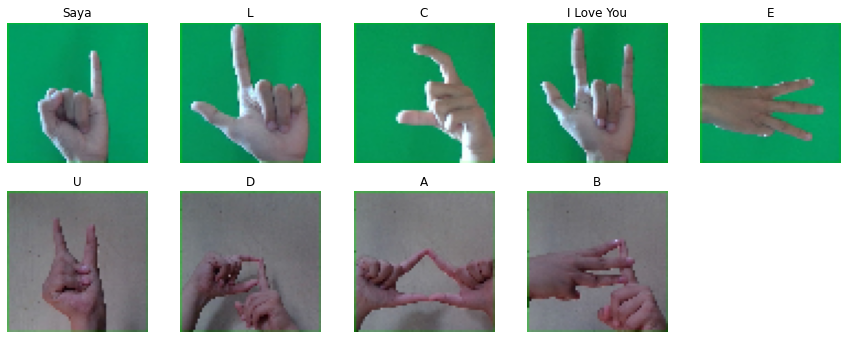

In [ ]:
from keras.backend_config import image_data_format
train_dir = '/content/drive/MyDrive/Colab Notebooks/train'
def load_unique():
    size_img = 64,64 
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_RGB2BGR)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 5
for i in range(1,10):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

## Membagi data dengan Imagedatagenerator

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/train/'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',

# Pemisahan Data menjadi Training dan Validation
      validation_split=0.2 # data validasi 20% dari total aset
      )

## Pelabelan data

In [ ]:
# Generator data Training
train_gen = training_datagen.flow_from_directory(
  base_dir,
  target_size=(256,256),# mengubah resolusi seluruh gambar menjadi 150x150 piksel
  color_mode='rgb',
  batch_size=32,
  class_mode='categorical',
  shuffle=True,
  seed=42,
  subset='training'
  )

# Generator data Validasi
val_gen = training_datagen.flow_from_directory(
  base_dir,
  target_size=(256,256), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle=True,
  seed=42,
  subset='validation',

  )

test_gen = training_datagen.flow_from_directory(
  base_dir,
  target_size=(256,256), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
  batch_size=1,
  color_mode='rgb',
  class_mode=None,
  shuffle=False,
  seed=42
  )   

Found 1734 images belonging to 9 classes.
Found 429 images belonging to 9 classes.
Found 2163 images belonging to 9 classes.


## Membuat Model CNN dengan Method Sequential

In [ ]:
# Menyederhanakan code
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

# model data menggunakan model Sequential
model = Sequential()

# Layer konvolusi pertama 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(255,255,3), name='Conv2D_1')) 
model.add(MaxPooling2D((2, 2), name='Pool_1'))

# Layer konvolusi kedua 
# Note : Lapisan Konv2D= param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1) = contoh : 
model.add(Conv2D(64, (3,3), activation='relu', name='Conv2D_2')) 
model.add(MaxPooling2D((2,2), name='Pool_2'))

# Layer konvolusi ketiga 
model.add(Conv2D(64, (3,3), activation='relu', name='Conv2D_3'))  
model.add(MaxPooling2D((2,2), name='Pool_3'))

# Layer konvolusi keempat 
model.add(Conv2D(128, (3,3), activation='relu', name='Conv2D_4')) 
model.add(MaxPooling2D((3,3), name='Pool_4'))

# Layer konvolusi kelima dengan ... filter(node) gambar
model.add(Conv2D(256, (3,3), activation='relu', name='Conv2D_5')) 
model.add(MaxPooling2D((2,2), name='Pool_5'))
model.add(Dropout(0.3, name='Neuron_Drop5'))

# Layer Input
model.add(Flatten(name='Input_Hidd_layer'))

# Hidden layer 1 Dengan ... Neuron neuron (node)
model.add(Dense(176, activation='relu', name="Hidd_layer1"))
model.add(Dropout(0.5, name='Drop_Hidden1'))
# param_number of dense = output_channel_number * (input_channel_number + 1)

# Hidden layer 2 Dengan 81 Neuron
model.add(Dense(81, activation='relu', name='Hidd_layer2'))
model.add(Dropout(0.2, name='Drop_Hidden2'))

# Hidden layer 3 Dengan .. Neuron
model.add(Dense(27, activation='relu', name='Hidd_layer3'))
model.add(Dropout(0.1, name='Drop_Hidden3'))

# Layer Output
model.add(Dense(9, activation='softmax', name='Output_Hidd_layer'))

# Melihat summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 Pool_1 (MaxPooling2D)       (None, 126, 126, 32)      0         
                                                                 
 Conv2D_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 Pool_2 (MaxPooling2D)       (None, 62, 62, 64)        0         
                                                                 
 Conv2D_3 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 Pool_3 (MaxPooling2D)       (None, 30, 30, 64)        0         
                                                                 
 Conv2D_4 (Conv2D)           (None, 28, 28, 128)       7

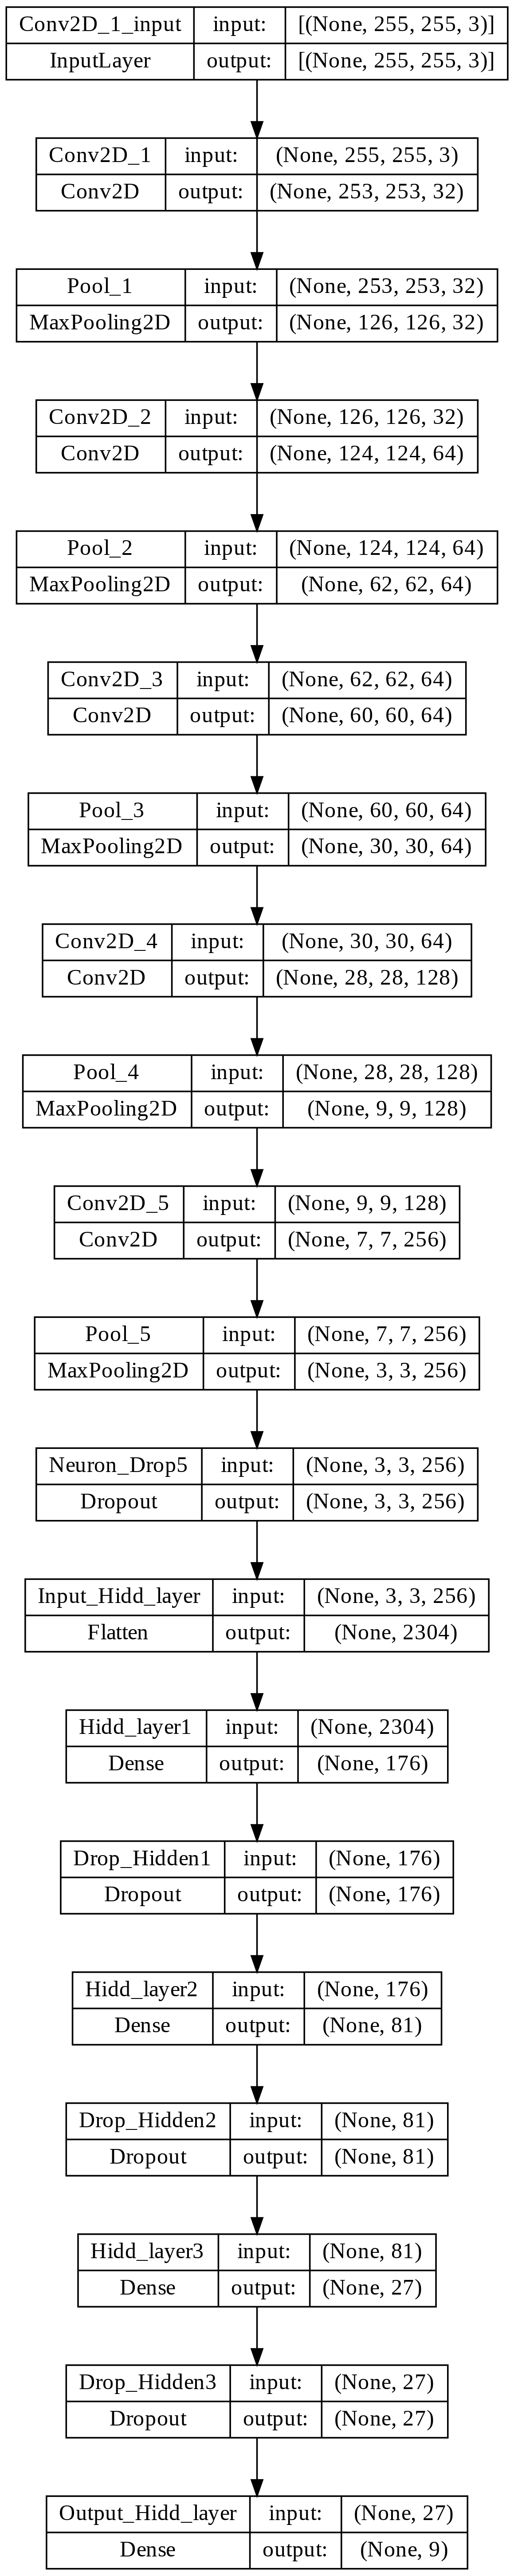

In [ ]:
model_image = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=256)
model_image

## Compile Model CNN

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)
print('Compiling Model')

Compiling Model


## Callback untuk mencegah overfitting

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.998): # Akan berhenti jika vacc melewati 100% data training
      print("\nTraining Dataset Dihentikan Karena accuracy Sudah Melebihi 99,8%") 
      self.model.stop_training = True

callbacks = myCallback()

## Training Data

In [ ]:
STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size #1734//32 (jumlah image train//jumlah batch_size)
STEP_SIZE_VALID=val_gen.n//val_gen.batch_size

history = model.fit(
    train_gen,
    steps_per_epoch = STEP_SIZE_TRAIN, 
    epochs = train_gen.n,
    validation_data = val_gen,
    validation_steps = STEP_SIZE_VALID, 
    verbose =1,
      callbacks=[callbacks]
)

loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print("\nAccuracy            = ","{:.2f}%".format(accuracy[-1]*100),
      "\nEvaluation Accuracy = ","{:.2f}%".format(val_acc[-1]*100), 
      "\nLoss                = ",'{:.2f}%'.format(loss[-1]*100),
      '\nEvaluation Loss     = ','{:.2f}%'.format(val_loss[-1]*100))

Epoch 1/1734
54/54 [==============================] - 628s 12s/step - loss: 2.0808 - accuracy: 0.1827 - val_loss: 1.6335 - val_accuracy: 0.2308
Epoch 2/1734
54/54 [==============================] - 144s 3s/step - loss: 1.6371 - accuracy: 0.2491 - val_loss: 1.5118 - val_accuracy: 0.2909
Epoch 3/1734
54/54 [==============================] - 143s 3s/step - loss: 1.5569 - accuracy: 0.2573 - val_loss: 1.4525 - val_accuracy: 0.2957
Epoch 4/1734
54/54 [==============================] - 143s 3s/step - loss: 1.4965 - accuracy: 0.2850 - val_loss: 1.3463 - val_accuracy: 0.3293
Epoch 5/1734
54/54 [==============================] - 146s 3s/step - loss: 1.3435 - accuracy: 0.3590 - val_loss: 1.2380 - val_accuracy: 0.4351
Epoch 6/1734
54/54 [==============================] - 146s 3s/step - loss: 1.2444 - accuracy: 0.4048 - val_loss: 1.1364 - val_accuracy: 0.4183
Epoch 7/1734
54/54 [==============================] - 146s 3s/step - loss: 1.1556 - accuracy: 0.4289 - val_loss: 1.0536 - val_accuracy: 0.463

In [ ]:
eval=model.evaluate(
    val_gen, 
    steps=STEP_SIZE_VALID,
    verbose=1) # catatan:masih bingung generator val_gen itu apa dan hasil ini itu apa

eval

13/13 [==============================] - 12s 919ms/step - loss: 0.0099 - accuracy: 0.9976


[0.009909679181873798, 0.9975961446762085]

In [ ]:
print("\nEvaluation Accuracy = ", "{:.2f}%".format(eval[-1]*100),
      "\nEvaluation loss = " ,"{:.2f}".format(eval[0]))


Evaluation Accuracy =  99.76% 
Evaluation loss =  0.01


In [ ]:
STEP_SIZE_TEST=test_gen.n//test_gen.batch_size
test_gen.reset()
pred=model.predict(test_gen,
steps=STEP_SIZE_TEST,
verbose=1)

2163/2163 [==============================] - 71s 33ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
import pandas as pd
filenames=test_gen.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)


In [ ]:
model.save('model.h5')

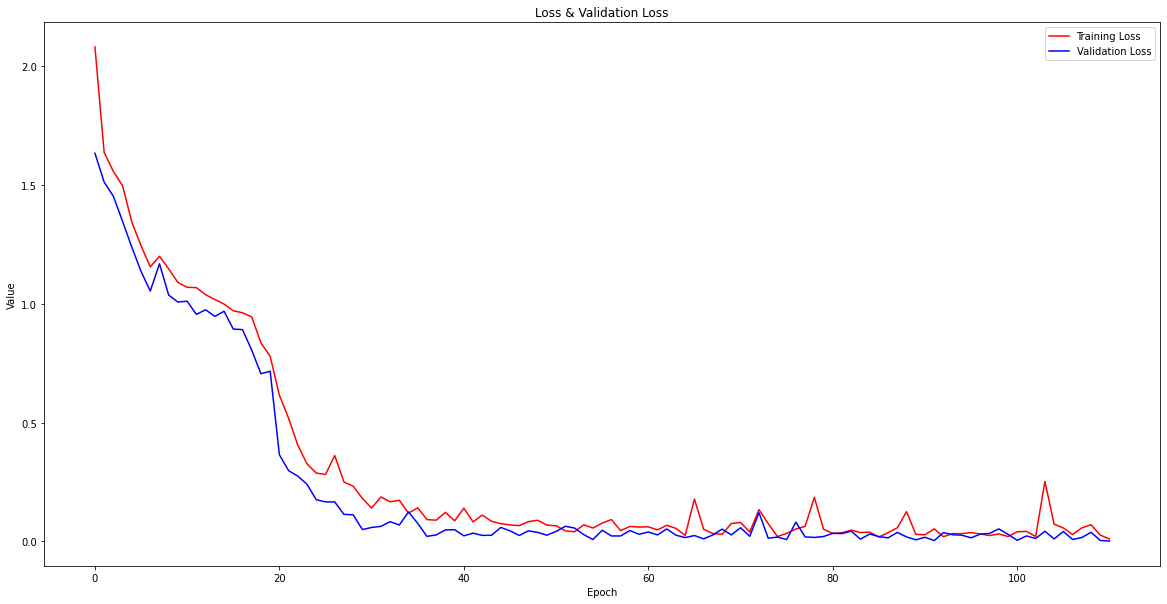

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

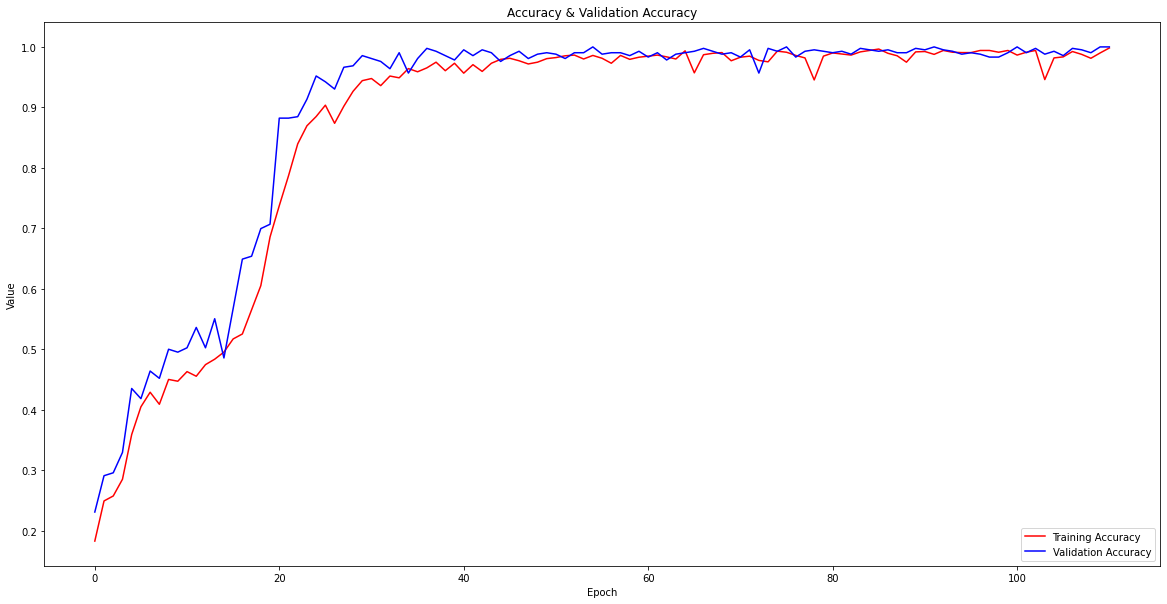

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()